<a id="Import"></a>
# <p style="background-color: #8EACCD; font-family:Pacifico; color:#ffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Laptop Prices Predictor</p>

#### **Special Note : All The Given Results and Paramters are According to My Device || You Can use More Heavy Params according to You Problem and Device.**

<img src="dataset-cover.jpg" width="1250" height="500">

<a id="Import"></a>
## <p style="background-color: #8EACCD; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">About Data</p>

* **Company**: Laptop Manufacturer.
* **Product**: Brand and Model.
* **TypeName**: Laptop Type (Notebook, Ultrabook, Gaming, …etc).
* **Inches**: Screen Size.
* **Ram**: Total amount of RAM in laptop (GBs).
* **OS**: Operating System installed.
* **Weight**: Laptop Weight in kilograms.
* **Price_euros**: Price of Laptop in Euros. (Target)
* **Screen**: screen definition (Standard, Full HD, 4K Ultra HD, Quad HD+).
* **ScreenW**: screen width (pixels).
* **ScreenH**: screen height (pixels).
* **Touchscreen**: whether or not the laptop has a touchscreen.
* **IPSpanel**: whether or not the laptop has an IPSpanel.
* **RetinaDisplay**: whether or not the laptop has retina display.
* CPU_company
* **CPU_freq**: frequency of laptop CPU (Hz).
* CPU_model
* **PrimaryStorage**: primary storage space (GB).
* **PrimaryStorageType**: primary storage type (HDD, SSD, Flash Storage, Hybrid).
* **SecondaryStorage**: secondary storage space if any (GB).
* **SecondaryStorageType**: secondary storage type (HDD, SSD, Hybrid, None).
* GPU_company
* GPU_model

<a id="Import"></a>
## <p style="background-color: #8EACCD; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Importing Libraries</p>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,2)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
palette = ['#87A2FF', "#C4D7FF","#FFD7C4","#FFF4B5"]
color_palette = sns.color_palette(palette)
plt.tight_layout()
%matplotlib inline

<Figure size 3000x500 with 0 Axes>

<a id="Import"></a>
## <p style="background-color: #8EACCD; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Loading Dataset</p>

In [3]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Laptop_Prices_Predicter/refs/heads/main/resources/Dataset/laptop_prices.csv')

df = raw_data.copy()
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


<a id="Import"></a>
## <p style="background-color: #8EACCD; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Data Cleaning / Scraping</p>

<a id="Import"></a>
### <p style="background-color: #8EACCD; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Searching For  Duplicated Value's</p>

In [4]:
df[df.duplicated()]

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model


<a id="Import"></a>
### <p style="background-color: #8EACCD; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Finding Unique  Value's</p>

In [21]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))

In [22]:
uni(df)


 All Unique Value in Company
['Acer' 'Apple' 'Asus' 'Chuwi' 'Dell' 'Fujitsu' 'Google' 'HP' 'Huawei'
 'LG' 'Lenovo' 'MSI' 'Mediacom' 'Microsoft' 'Razer' 'Samsung' 'Toshiba'
 'Vero' 'Xiaomi']
Total no of unique values 19

 All Unique Value in Product
['110-15ACL (A6-7310/4GB/500GB/W10)' '14-am079na (N3710/8GB/2TB/W10)'
 '15-AC110nv (i7-6500U/6GB/1TB/Radeon' '15-AY023na (N3710/8GB/2TB/W10)'
 '15-BA015wm (E2-7110/4GB/500GB/W10)'
 '15-BS026nv (i5-7200U/8GB/256GB/Radeon'
 '15-BS028nv (i3-6006U/4GB/1TB/Radeon' '15-BS078nr (i7-7500U/8GB/1TB/W10)'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)'
 '15-BS103nv (i5-8250U/6GB/256GB/Radeon'
 '15-BW004nv (A9-9420/4GB/256GB/Radeon'
 '15-BW037na (A9-9420/4GB/1TB/Radeon' '15-BW091ND (A9-9420/6GB/1TB'
 '15-BW094nd (A6-9220/8GB/128GB/W10)'
 '15-ay047nv (i3-6006U/6GB/1TB/Radeon'
 '15-ba043na (A12-9700P/8GB/2TB/W10)'
 '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)' '15-bs005nv (i3-6006U/4GB/1TB'
 '15-bs011nv (i7-7500U/4GB/500GB/Radeon'
 '15-bs012nv (i7-7500U/8GB/1TB/R

<p style="color:#8EACCD; font-size:200%"> Dropping Product Column</p>

In [ ]:
df.drop(['Product'], axis = 1, inplace = True)

<p style="color:#8EACCD; font-size:200%"> Changing "NO OS" To NAN Value In OS Column</p>

In [46]:
df[df['OS'] == 'No OS']

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model


In [38]:
df.replace(to_replace="No OS",value=np.nan, inplace=True)

In [39]:
df['OS'].unique()

array(['macOS', nan, 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

<a id="Import"></a>
### <p style="background-color: #8EACCD; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Checking For  Missing Value's</p>

In [49]:
def missing_percentage(ch):

    m = ch.isna().sum()
    total = int(ch.shape[0])

    for i in range(len(ch.columns)):
        percentage =round((m[i]/total)*100)

        print(str(ch.columns[i]) + ' has ' + str(percentage) + ' % missing value(' + str(m[i]) + ')')

In [50]:
missing_percentage(df)

Company has 0 % missing value(0)
TypeName has 0 % missing value(0)
Inches has 0 % missing value(0)
Ram has 0 % missing value(0)
OS has 5 % missing value(66)
Weight has 0 % missing value(0)
Price_euros has 0 % missing value(0)
Screen has 0 % missing value(0)
ScreenW has 0 % missing value(0)
ScreenH has 0 % missing value(0)
Touchscreen has 0 % missing value(0)
IPSpanel has 0 % missing value(0)
RetinaDisplay has 0 % missing value(0)
CPU_company has 0 % missing value(0)
CPU_freq has 0 % missing value(0)
CPU_model has 0 % missing value(0)
PrimaryStorage has 0 % missing value(0)
SecondaryStorage has 0 % missing value(0)
PrimaryStorageType has 0 % missing value(0)
SecondaryStorageType has 0 % missing value(0)
GPU_company has 0 % missing value(0)
GPU_model has 0 % missing value(0)


<p style="color:#8EACCD; font-size:200% "> Plotting Heatmap For Missing Values </p>

<Axes: >

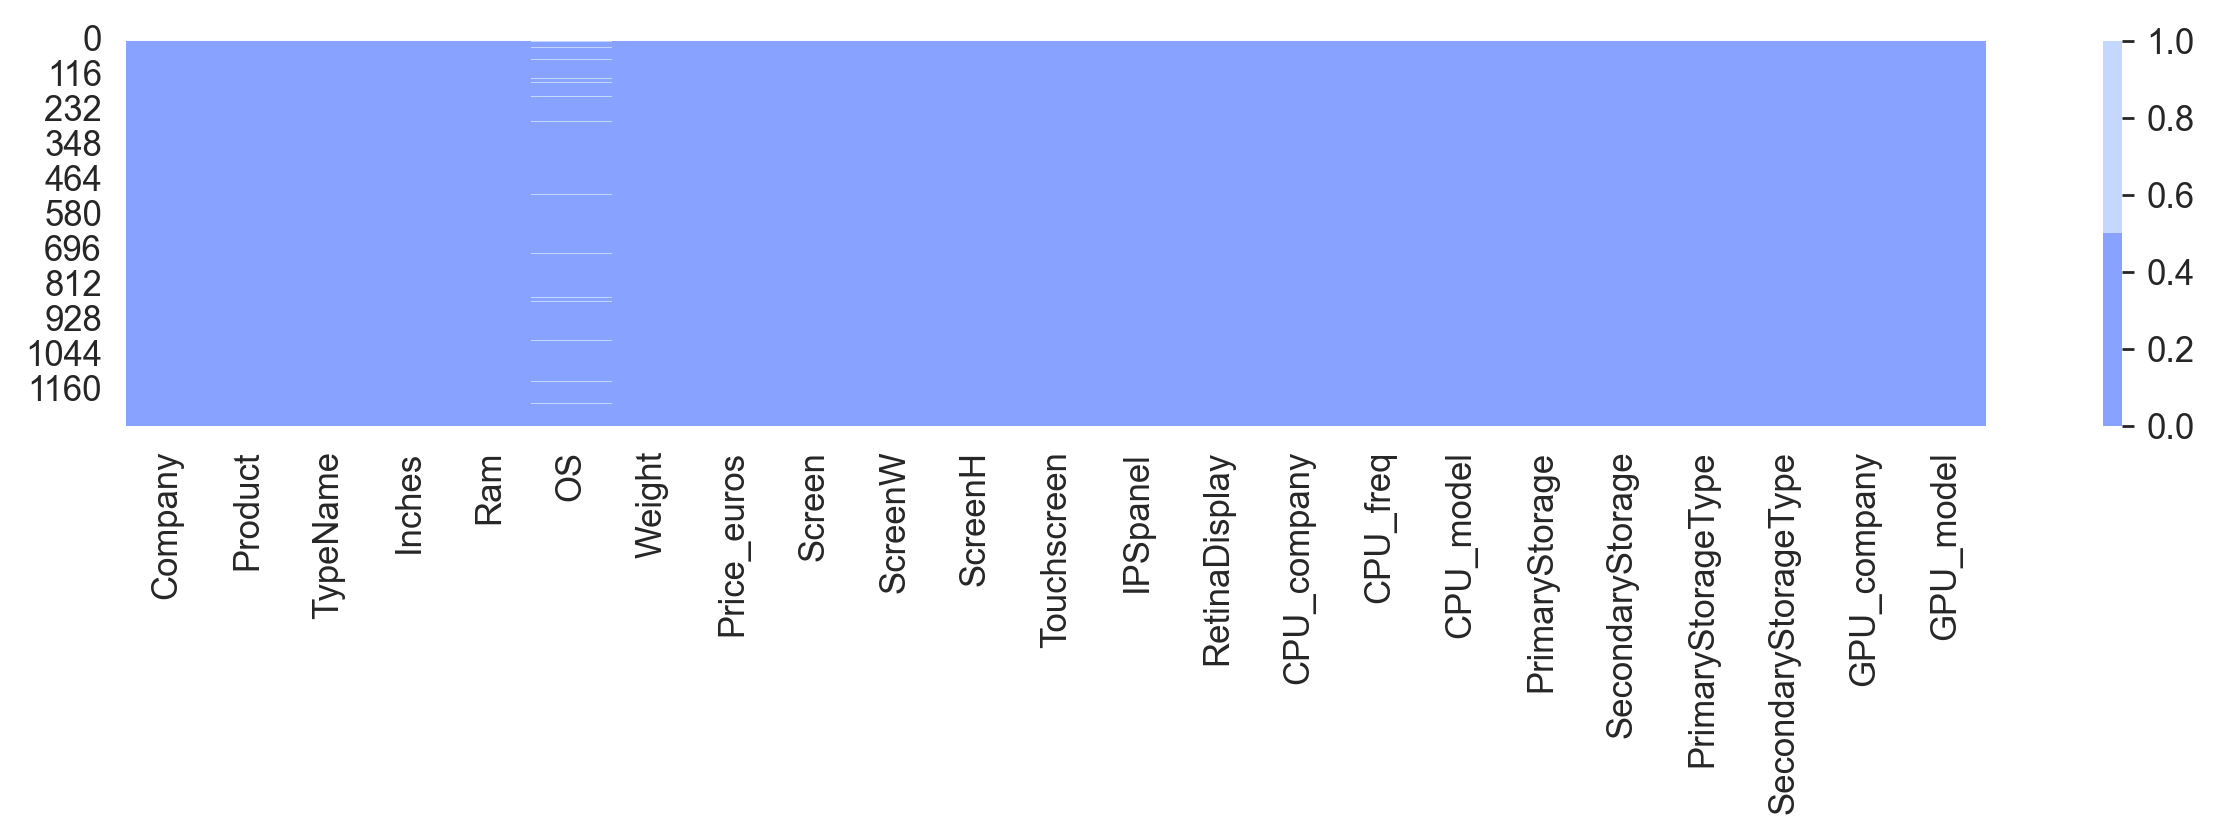

In [42]:
sns.heatmap(df.isna(), cmap = ['#87A2FF', "#C4D7FF"])

<a id="Import"></a>
### <p style="background-color: #8EACCD; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Outlier Detection</p>

In [52]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(round(percentage,2)) + ' %')


In [53]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)


In [54]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st


In [56]:
num = df.select_dtypes(include=np.number).columns.tolist()

num

['Inches',
 'Ram',
 'Weight',
 'Price_euros',
 'ScreenW',
 'ScreenH',
 'CPU_freq',
 'PrimaryStorage',
 'SecondaryStorage']

In [57]:
outlier_percentage(df[num])

Inches : 2.9 %
Ram : 17.18 %
Weight : 3.53 %
Price_euros : 2.2 %
ScreenW : 34.27 %
ScreenH : 34.67 %
CPU_freq : 0.16 %
PrimaryStorage : 20.08 %
SecondaryStorage : 16.31 %
